# Load data


In [84]:
import pandas as pd
from PIL import Image


In [85]:
df = pd.read_excel("./data/all_foodpictures_information.xlsx")
df = df.dropna(subset=["image nr", "Description"])
df.shape


(840, 62)

In [86]:
df["image nr"] = df["image nr"].astype(int)
df["image_name"] = df["image nr"].astype(str).str.zfill(4)
df.head()


,image nr,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,State of food,Food vs nonfood,FPC,S,...,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP,image_name
0,1,Oranges,Universal,2,Natural,Sweet,Raw,Food,0.2439,4.6617,...,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61,0001
1,2,Apples,Universal,3,Natural,Sweet,Raw,Food,0.3338,5.0094,...,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88,0002
2,3,Apple + parts,Universal,12,Natural,Sweet,Raw,Food,0.4168,4.9397,...,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61,0003
3,4,Appleparts,Universal,11,Natural,Sweet,Raw,Food,0.3115,4.7412,...,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77,0004
4,5,Grasshopper,Unappealing,50,Natural,Savory,NaN,Food,0.3107,4.9059,...,29.74,13.11,21.99,14.66,25.69,18.79,26.14,6.29,9.31,0005


Oranges


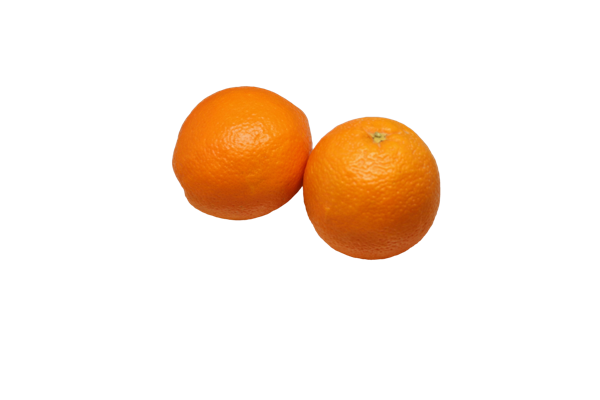

In [87]:
food = df.loc[0]
print(food.Description)
image = Image.open("./data/pictures/" + food.image_name + ".png")
image = image.resize((600, 400))
display(image)


In [88]:
print(f"There are {len(df.Description.unique())} different food description")


There are 662 different food description


In [89]:
# create honey pots to check veracity of answers
honey_pots = df[(df["Food classification"] == "Unappealing") | (df["Food vs nonfood"] == "Non-food")]
honey_pots.shape

(126, 63)

In [90]:
# keep the "food" type and not contaminated food
df = df[(df["Food vs nonfood"] == "Food") & (df["State of food"] != "Contaminated") & (df["Food classification"] != "Unappealing")]

# remove the "same" food. The images are different but same meaning 
df = df.drop_duplicates(subset="Description")

print("Only food dataset has {} rows".format(df.shape[0]))


Only food dataset has 521 rows


In [91]:
df[["image nr", "Description"]].to_csv("processed_data.csv")

In [92]:
# create mock dataset
df[["image nr", "Description"]][:4].to_csv("mock_processed_data.csv")

## Try to encode images in base64


In [93]:
import base64
from PIL import Image
from io import BytesIO

with open("./data/pictures/0001.png", "rb") as image_file:
    data = base64.b64encode(image_file.read())
im = Image.open(BytesIO(base64.b64decode(data)))
im.save("image1.png", "PNG")

In [94]:
import sys
sys.getsizeof(data)

3692101